# Comparison of channel simulations with and without ANN

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid

In [2]:
path_noGM_seamount = '/home/db194/scratch_db194/mom6/apr2025/MOM6_channel_p25_topo_noGM_test_speed/'
path_ANN_seamount = '/home/db194/scratch_db194/mom6/nov2025/MOM6_channel/MOM6_channel_p25_topo_ANN_from_restart/'
path_ANN_seamount_FGNV = '/home/db194/scratch_db194/mom6/nov2025/MOM6_channel/MOM6_channel_p25_topo_ANN_from_restart_FGNV/'


In [3]:
ds_noGM_seamount = xr.open_dataset(path_noGM_seamount + 'prog_01801.nc').isel(xq=slice(1,None), yq=slice(1,None))
ds_ANN_seamount = xr.open_dataset(path_ANN_seamount + 'prog_04801.nc').isel(xq=slice(1,None), yq=slice(1,None))
ds_ANN_seamount_FGNV = xr.open_dataset(path_ANN_seamount_FGNV + 'prog_04801.nc').isel(xq=slice(1,None), yq=slice(1,None))

In [4]:
dsz_noGM_seamount = xr.open_dataset(path_noGM_seamount + 'prog_z_01801.nc').isel(xq=slice(1,None), yq=slice(1,None))
dsz_ANN_seamount = xr.open_dataset(path_ANN_seamount + 'prog_z_04801.nc').isel(xq=slice(1,None), yq=slice(1,None))
dsz_ANN_seamount_FGNV = xr.open_dataset(path_ANN_seamount_FGNV + 'prog_z_04801.nc').isel(xq=slice(1,None), yq=slice(1,None))

In [5]:
#os_noGM_seamount = xr.open_dataset(path_noGM_seamount + 'ocean.stats.nc')
#os_ANN_seamount = xr.open_dataset(path_ANN_seamount + 'ocean.stats.nc')
#os_ANN_seamount_FGNV = xr.open_dataset(path_ANN_seamount_FGNV + 'ocean.stats.nc')

# OS files got corrupted due to restarts. Not using them for now.

## Snapshots

In [6]:
def add_vorticity( ds ):
    grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                            'Y': {'center': 'yh', 'right': 'yq'},
                            'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])

    v_x = grid.diff(ds['v'], 'X') / grid.diff(ds['xh'], 'X')/110574/np.cos(np.deg2rad(ds['yq']))  # convert to meters
    u_y = grid.diff(ds['u'], 'Y', boundary='extend') / grid.diff(ds['yh'], 'Y')/110574  # convert to meters

    vort = v_x - u_y
    ds['vort'] = vort

    return ds

In [7]:
dsz_GM_seamount = add_vorticity(dsz_noGM_seamount)
dsz_ANN_seamount = add_vorticity(dsz_ANN_seamount)
dsz_ANN_seamount_FGNV = add_vorticity(dsz_ANN_seamount_FGNV)

/ext3/miniconda3/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


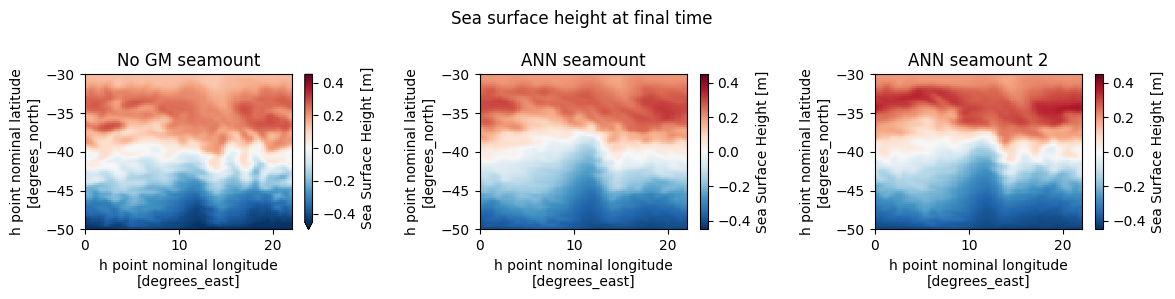

In [8]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
ds_noGM_seamount.ssh.isel(Time=-1).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('No GM seamount')

plt.subplot(1,3,2)
ds_ANN_seamount.ssh.isel(Time=-1).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('ANN seamount')

plt.subplot(1,3,3)
ds_ANN_seamount_FGNV.ssh.isel(Time=-1).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('ANN seamount 2')

plt.suptitle('Sea surface height at final time')
plt.tight_layout()
#dsz_noGM_seamount.temp.isel(Time=-1, z_l=2).plot()

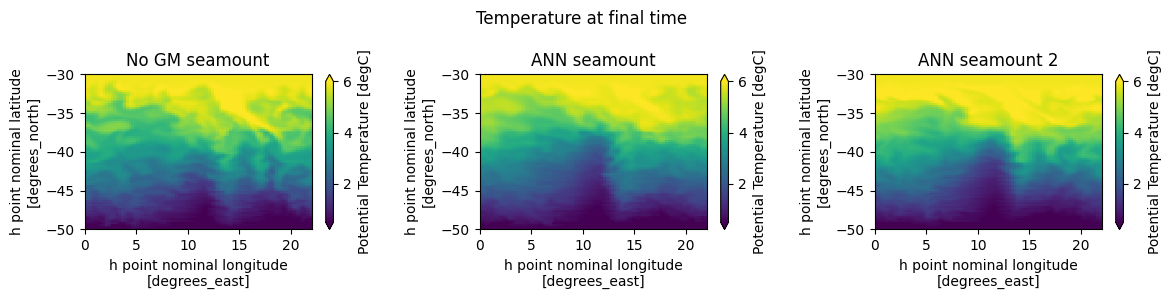

In [9]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
dsz_noGM_seamount.temp.isel(Time=-1, z_l=2).plot(vmin=0.5, vmax=6)
plt.title('No GM seamount')

plt.subplot(1,3,2)
dsz_ANN_seamount.temp.isel(Time=-1, z_l=2).plot(vmin=0.5, vmax=6)
plt.title('ANN seamount')
plt.subplot(1,3,3)

dsz_ANN_seamount_FGNV.temp.isel(Time=-1, z_l=2).plot(vmin=0.5, vmax=6)
plt.title('ANN seamount 2')
plt.suptitle('Temperature at final time')
plt.tight_layout()

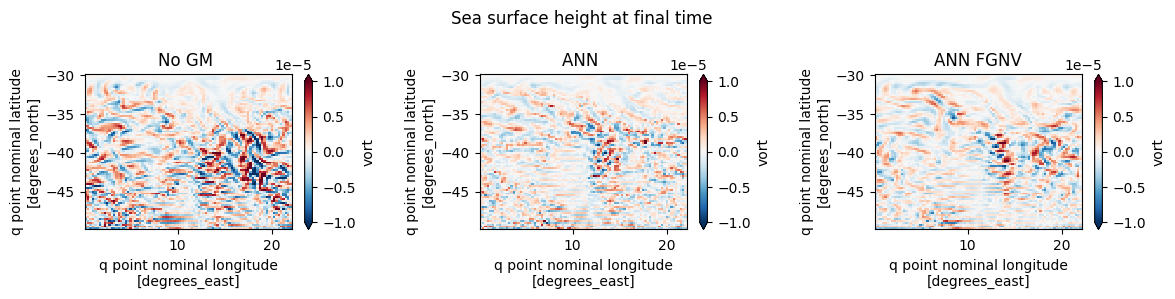

In [10]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
dsz_GM_seamount.vort.isel(Time=-1, z_l=0).plot(vmin=-1e-5)
plt.title('No GM ')

plt.subplot(1,3,2)
dsz_ANN_seamount.vort.isel(Time=-1, z_l=0).plot(vmin=-1e-5)
plt.title('ANN ')

plt.subplot(1,3,3)
dsz_ANN_seamount_FGNV.vort.isel(Time=-1, z_l=0).plot(vmin=-1e-5)
plt.title('ANN FGNV')

plt.suptitle('Sea surface height at final time')
plt.tight_layout()
#dsz_noGM_seamount.temp.isel(Time=-1, z_l=2).plot()

## Mean state

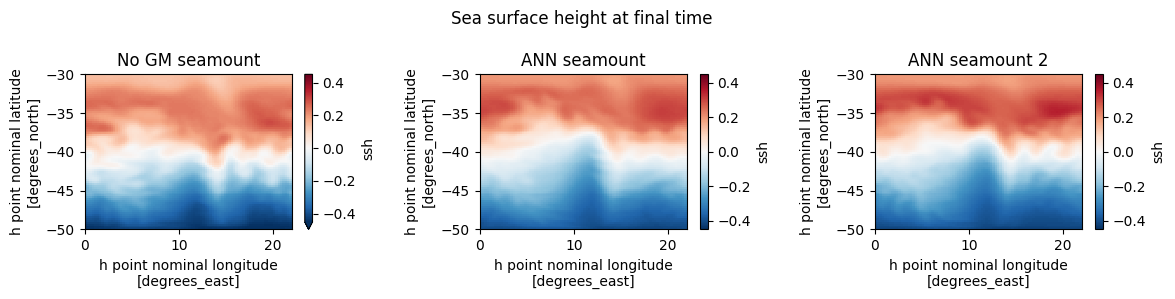

In [11]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
ds_noGM_seamount.ssh.mean('Time').plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('No GM seamount')

plt.subplot(1,3,2)
ds_ANN_seamount.ssh.mean('Time').plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('ANN seamount')

plt.subplot(1,3,3)
ds_ANN_seamount_FGNV.ssh.mean('Time').plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('ANN seamount 2')

plt.suptitle('Sea surface height at final time')
plt.tight_layout()
#dsz_noGM_seamount.temp.isel(Time=-1, z_l=2).plot()

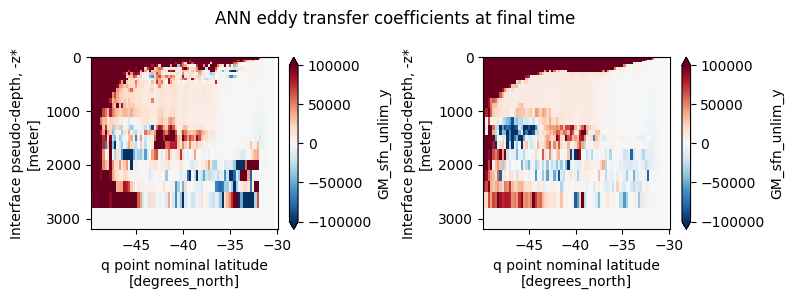

In [17]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
ds_ANN_seamount.GM_sfn_unlim_y.mean(dim=['Time', 'xh']).plot(robust=True, vmin=-1e5)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
ds_ANN_seamount_FGNV.GM_sfn_unlim_y.mean(dim=['Time', 'xh']).plot(robust=True, vmin=-1e5)
plt.gca().invert_yaxis()

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()

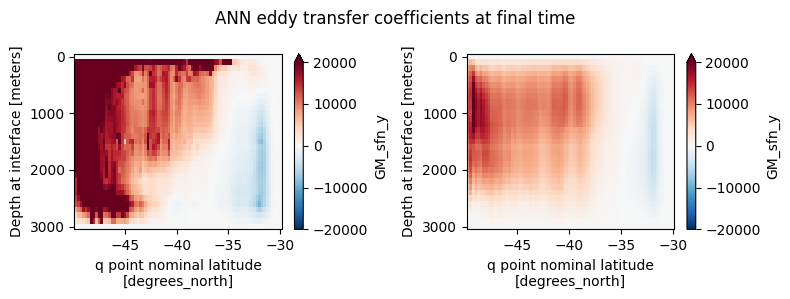

In [16]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_ANN_seamount.GM_sfn_y.mean(dim=['Time', 'xh']).plot(robust=True, vmin=-2e4)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
dsz_ANN_seamount_FGNV.GM_sfn_y.mean(dim=['Time', 'xh']).plot(robust=True, vmin=-2e4)
plt.gca().invert_yaxis()

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()

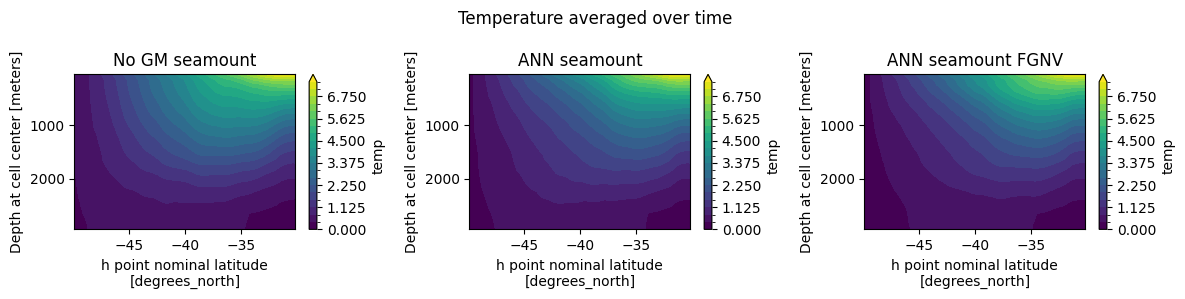

In [18]:
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
dsz_noGM_seamount.temp.mean(dim=['Time', 'xh']).plot.contourf(vmin=0, vmax=7.5, levels=21)
plt.gca().invert_yaxis()
plt.title('No GM seamount')

plt.subplot(1,3,2)
dsz_ANN_seamount.temp.mean(dim=['Time', 'xh']).plot.contourf(vmin=0, vmax=7.5, levels=21)
plt.gca().invert_yaxis()
plt.title('ANN seamount')

plt.subplot(1,3,3)
dsz_ANN_seamount_FGNV.temp.mean(dim=['Time', 'xh']).plot.contourf(vmin=0, vmax=7.5, levels=21)
plt.gca().invert_yaxis()
plt.title('ANN seamount FGNV')

plt.suptitle('Temperature averaged over time')
plt.tight_layout()

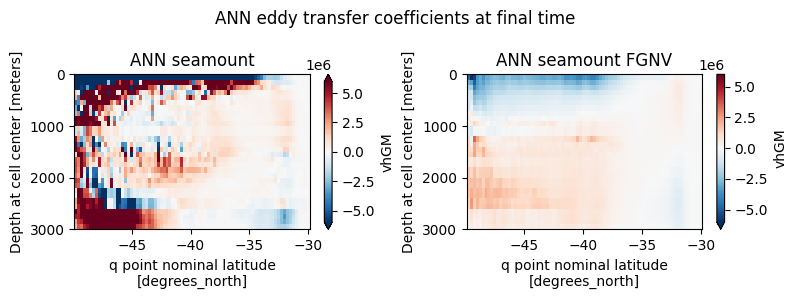

In [19]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_ANN_seamount.vhGM.mean(['Time', 'xh']).plot(robust=True, vmin=-6e6)
plt.gca().invert_yaxis()
plt.title('ANN seamount')

plt.subplot(1,2,2)
dsz_ANN_seamount_FGNV.vhGM.mean(['Time', 'xh']).plot(robust=True, vmin=-6e6)
plt.gca().invert_yaxis()
plt.title('ANN seamount FGNV')

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()


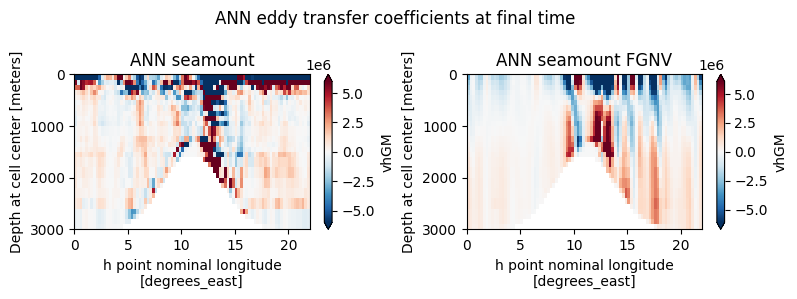

In [20]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_ANN_seamount.vhGM.mean(['Time']).sel(yq=-40, method='nearest').plot(robust=True, vmin=-6e6)
plt.gca().invert_yaxis()
plt.title('ANN seamount')

plt.subplot(1,2,2)
dsz_ANN_seamount_FGNV.vhGM.mean(['Time']).sel(yq=-40, method='nearest').plot(robust=True)
plt.gca().invert_yaxis()
plt.title('ANN seamount FGNV')

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()


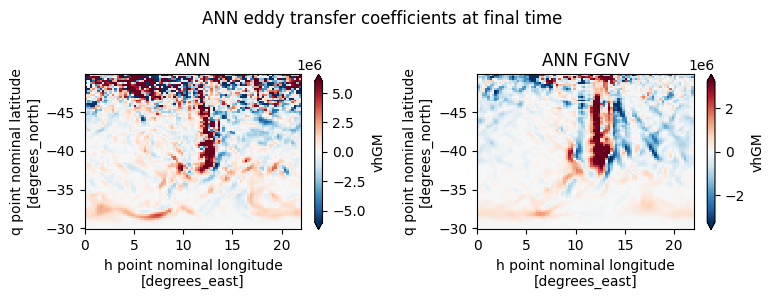

In [22]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_ANN_seamount.vhGM.mean(['Time']).sel(z_l=800, method='nearest').plot(robust=True, vmin=-6e6)
plt.gca().invert_yaxis()
plt.title('ANN')

plt.subplot(1,2,2)
dsz_ANN_seamount_FGNV.vhGM.mean(['Time']).sel(z_l=800, method='nearest').plot(robust=True)
plt.gca().invert_yaxis()
plt.title('ANN FGNV')

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()


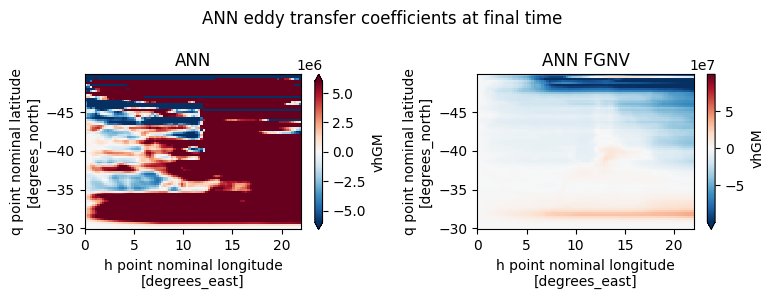

In [24]:
zsel = 600
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_ANN_seamount.vhGM.mean(['Time']).sel(z_l=zsel, method='nearest').cumsum('xh').plot(robust=True, vmin=-6e6)
plt.gca().invert_yaxis()
plt.title('ANN')

plt.subplot(1,2,2)
dsz_ANN_seamount_FGNV.vhGM.mean(['Time']).sel(z_l=zsel, method='nearest').cumsum('xh').plot(robust=True)
plt.gca().invert_yaxis()
plt.title('ANN FGNV')

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()


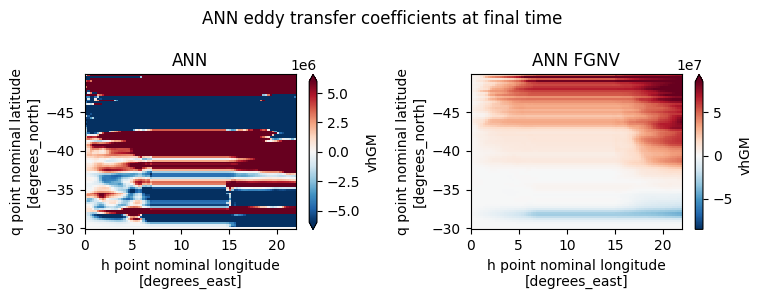

In [26]:
zsel = 2400
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_ANN_seamount.vhGM.mean(['Time']).sel(z_l=zsel, method='nearest').cumsum('xh').plot(robust=True, vmin=-6e6)
plt.gca().invert_yaxis()
plt.title('ANN')

plt.subplot(1,2,2)
dsz_ANN_seamount_FGNV.vhGM.mean(['Time']).sel(z_l=zsel, method='nearest').cumsum('xh').plot(robust=True)
plt.gca().invert_yaxis()
plt.title('ANN FGNV')

plt.suptitle('ANN eddy transfer coefficients at final time')
plt.tight_layout()


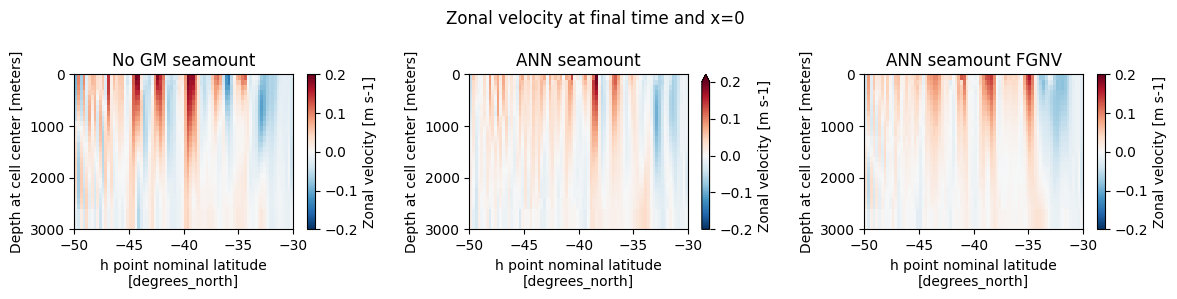

In [30]:
plt.figure(figsize=(12, 3))

plt.subplot(1,3,1)
dsz_noGM_seamount.u.isel(Time=-1).sel(xq=0, method='nearest').plot(vmin=-0.2)
plt.gca().invert_yaxis()
plt.title('No GM seamount')

plt.subplot(1,3,2)
dsz_ANN_seamount.u.isel(Time=-1).sel(xq=0, method='nearest').plot(vmin=-0.2)
plt.gca().invert_yaxis()
plt.title('ANN seamount')

plt.subplot(1,3,3)
dsz_ANN_seamount_FGNV.u.isel(Time=-1).sel(xq=0, method='nearest').plot(vmin=-0.2)
plt.gca().invert_yaxis()
plt.title('ANN seamount FGNV')
plt.suptitle('Zonal velocity at final time and x=0')
plt.tight_layout()


## Spectra

In [27]:
import xrft

In [28]:
ps_v_noGM = xrft.power_spectrum(dsz_noGM_seamount.v, dim=['xh']) 
ps_v_ANN = xrft.power_spectrum(dsz_ANN_seamount.v, dim=['xh'])
ps_v_ANN_FGNV = xrft.power_spectrum(dsz_ANN_seamount_FGNV.v, dim=['xh'])

In [ ]:
ps_v_noGM = xrft.power_spectrum(dsz_noGM_seamount.v, dim=['xh']) 
ps_v_ANN = xrft.power_spectrum(dsz_ANN_seamount.v, dim=['xh'])
ps_v_ANN_FGNV = xrft.power_spectrum(dsz_ANN_seamount_FGNV.v, dim=['xh'])

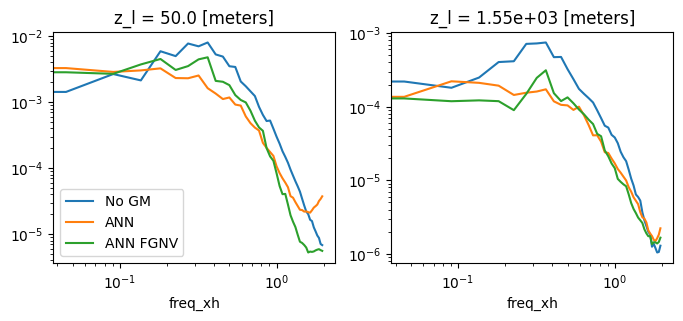

In [29]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
ps_v_noGM.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='No GM')
ps_v_ANN.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='ANN')
ps_v_ANN_FGNV.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='ANN FGNV')

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.subplot(1,2,2)
ps_v_noGM.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='No GM')
ps_v_ANN.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='ANN')
ps_v_ANN_FGNV.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='ANN FGNV')

plt.xscale('log')
plt.yscale('log')
